# Channel mapping

In [30]:
# PACKAGES
from pynwb import NWBHDF5IO
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

# DATASET PATHS
# TODO: update paths
file_path_depth_1 = "/gpfs/bbp.cscs.ch/project/proj68/scratch/imbeni/sorting/dataset/horvath/Rat01/Insertion1/Depth1/Rat01_Insertion1_Depth1.nwb"
file_path_depth_2 = "/gpfs/bbp.cscs.ch/project/proj68/scratch/imbeni/sorting/dataset/horvath/Rat01/Insertion1/Depth2/Rat01_Insertion1_Depth2.nwb"
file_path_depth_3 = "/gpfs/bbp.cscs.ch/project/proj68/scratch/imbeni/sorting/dataset/horvath/Rat01/Insertion1/Depth3/Rat01_Insertion1_Depth3.nwb"

In [31]:
def read_file_metadata(file_path):
    """read nwb file (provides access to all the metadata in contrast to SpikeInterface's
    NwbRecordingExtractor

    Args:
        file_path (_type_): _description_

    Returns:
        _type_: _description_
    """
    return NWBHDF5IO(file_path, mode="r").read()

,x,y,z,imp,location,filtering,group,group_name,rel_x,rel_y
id,,,,,,,,,,
1,b'NaN',b'NaN',b'NaN',b'NaN',"b'S1HL, Outside of the cortex'",b'Bandpass: 0.1-7500 Hz',Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...,b'Probe_D09_R13',16.0,707.5
2,b'NaN',b'NaN',b'NaN',b'NaN',"b'S1HL, Outside of the cortex'",b'Bandpass: 0.1-7500 Hz',Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...,b'Probe_D09_R13',38.5,707.5
3,b'NaN',b'NaN',b'NaN',b'NaN',"b'S1HL, Outside of the cortex'",b'Bandpass: 0.1-7500 Hz',Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...,b'Probe_D09_R13',61.0,707.5
4,b'NaN',b'NaN',b'NaN',b'NaN',"b'S1HL, Outside of the cortex'",b'Bandpass: 0.1-7500 Hz',Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...,b'Probe_D09_R13',83.5,707.5
5,b'NaN',b'NaN',b'NaN',b'NaN',"b'S1HL, Outside of the cortex'",b'Bandpass: 0.1-7500 Hz',Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...,b'Probe_D09_R13',16.0,685.0
...,...,...,...,...,...,...,...,...,...,...
124,b'NaN',b'NaN',b'NaN',b'NaN',"b'S1HL, L2/3'",b'Bandpass: 0.1-7500 Hz',Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...,b'Probe_D09_R13',83.5,32.5
125,b'NaN',b'NaN',b'NaN',b'NaN',"b'S1HL, L2/3'",b'Bandpass: 0.1-7500 Hz',Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...,b'Probe_D09_R13',16.0,10.0
126,b'NaN',b'NaN',b'NaN',b'NaN',"b'S1HL, L2/3'",b'Bandpass: 0.1-7500 Hz',Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...,b'Probe_D09_R13',38.5,10.0


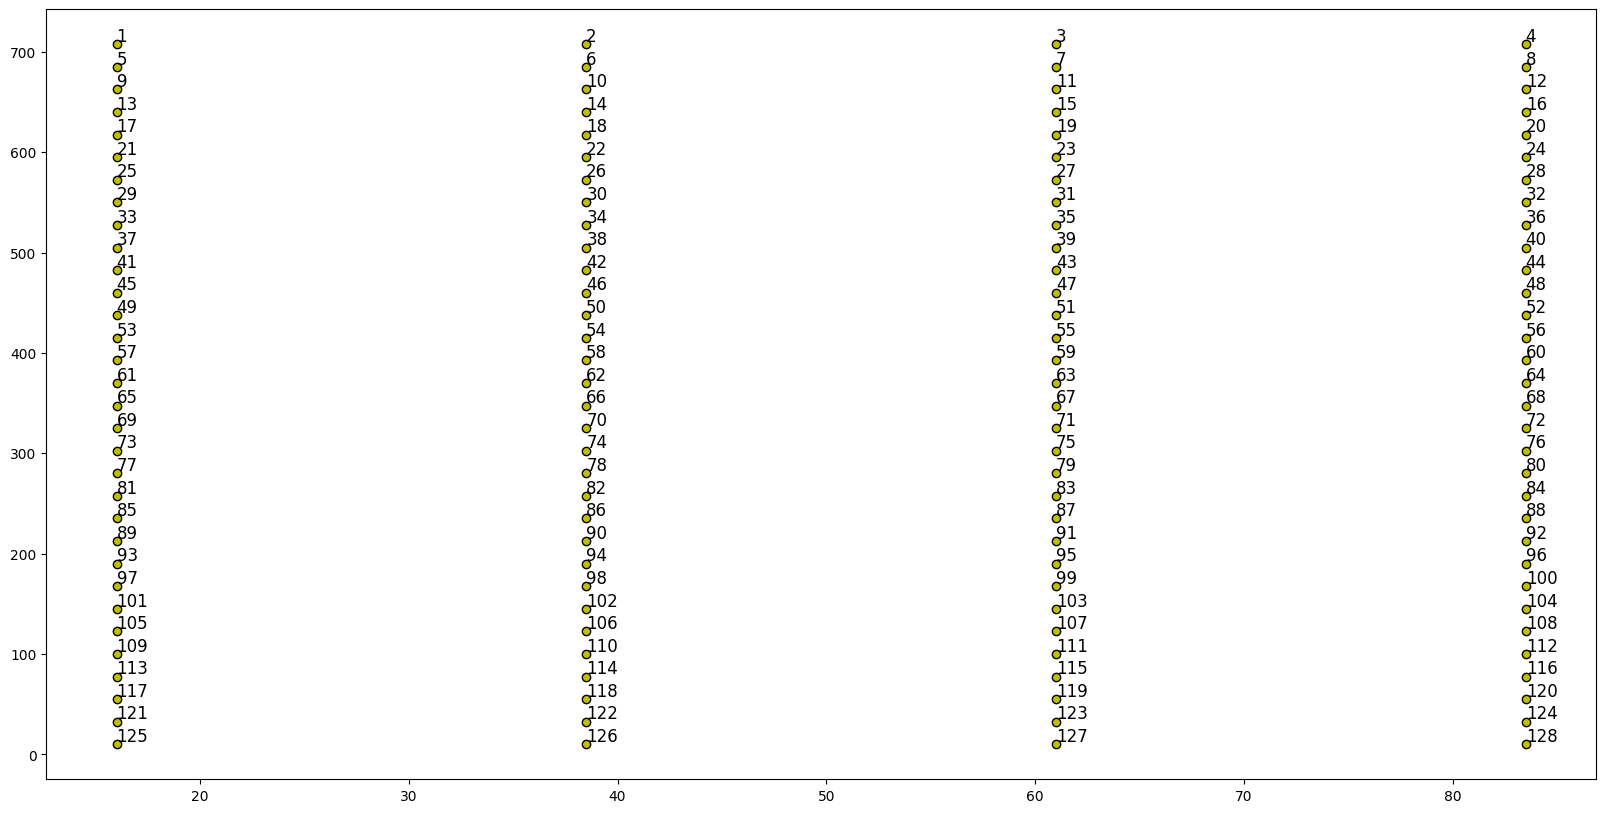

In [32]:
# list metadata
Recording_depth_1 = read_file_metadata(file_path_depth_1)

# list electrodes metadata
df = Recording_depth_1.electrodes.to_dataframe()
display(df)
contact_ids = df.index

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

# add contacts
ax.plot(
    df["rel_x"].values,
    df["rel_y"].values,
    marker=".",
    markersize=12,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)

# annotate contacts with their ids
for ix in range(len(df["rel_x"])):
    ax.text(
        df["rel_x"].values[ix],
        df["rel_y"].values[ix] + 3,
        "%s" % (str(contact_ids[ix])),
        size=12,
        zorder=100,
        color="k",
    )

### Order contact id for probeinterface

add to parameters.yml file

In [45]:
pi_contact_ids = np.reshape(contact_ids, newshape=(32, 4)).T.flatten()
pi_contact_ids

array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101,
       105, 109, 113, 117, 121, 125,   2,   6,  10,  14,  18,  22,  26,
        30,  34,  38,  42,  46,  50,  54,  58,  62,  66,  70,  74,  78,
        82,  86,  90,  94,  98, 102, 106, 110, 114, 118, 122, 126,   3,
         7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,  55,
        59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103, 107,
       111, 115, 119, 123, 127,   4,   8,  12,  16,  20,  24,  28,  32,
        36,  40,  44,  48,  52,  56,  60,  64,  68,  72,  76,  80,  84,
        88,  92,  96, 100, 104, 108, 112, 116, 120, 124, 128])